In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from seaborn import heatmap
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("houses_sub.csv")

In [5]:
df.describe()
df.head()

,Unnamed: 0,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,GarageArea,YrSold,LotShape,LotConfig,SalePrice
0,0,8450,7,5,2003,2003,1710,2,3,1,548,2008,Reg,Inside,208500
1,1,9600,6,8,1976,1976,1262,2,3,1,460,2007,Reg,FR2,181500
2,2,11250,7,5,2001,2002,1786,2,3,1,608,2008,IR1,Inside,223500
3,3,9550,7,5,1915,1970,1717,1,3,1,642,2006,IR1,Corner,140000
4,4,14260,8,5,2000,2000,2198,2,4,1,836,2008,IR1,FR2,250000


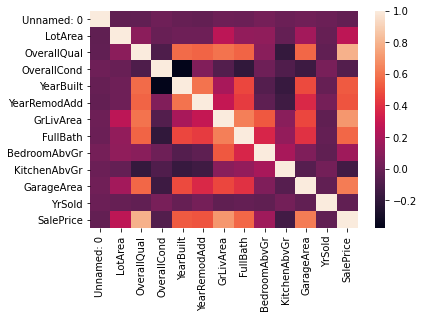

In [6]:
corr = df.corr()
hp = heatmap(corr)

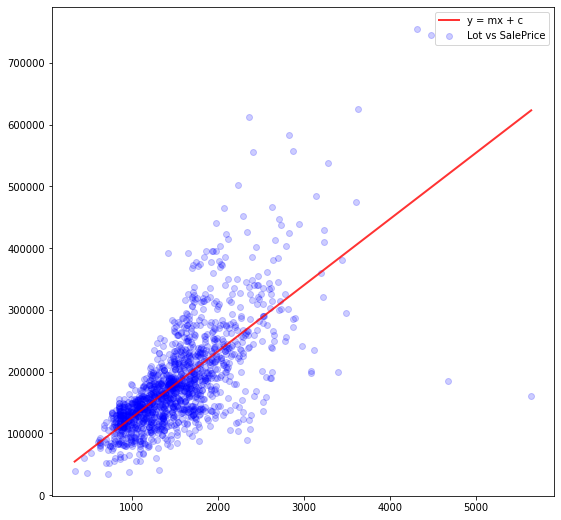

In [27]:
#we can see the lot area and sale price have high correlation 
#we will focus lot area as our independent variable and sale price as the dependent variable 

figure = plt.figure(figsize = (9,9))
x = np.array(df['GrLivArea']).reshape(-1,1)
y = np.array(df['SalePrice']).reshape(-1,1)

plt.scatter(x, y, color = 'blue', label = "Lot vs SalePrice", alpha = 0.2)

lr = LinearRegression()

model = lr.fit(x,y)

c = model.intercept_

y1 = model.coef_*(x.min()) + c
y2 = model.coef_*(x.max()) + c 

x_arr = np.array([x.min(), x.max()]).reshape(-1,1)
y_arr = np.array([y1, y2]).reshape(-1,1)




plt.plot(x_arr, y_arr, color = 'red', alpha = 0.8, label = "y = mx + c ", linewidth = 2)
plt.legend()


In [31]:
print("Correlation: ", model.score(x,y))
print(f"y = {model.coef_}x + {model.intercept_} ")

Correlation:  0.5021486502718042
y = [[107.13035897]]x + [18569.02585649] 
